# Premier modèle IA

## Regression linéaire simple

### récupération des données

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
data = pd.read_csv("./Data_Reg/reg_simple.csv")
data.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [42]:
x=np.array(data["heure_rev"])#pour recuperer le vecteur X
x.reshape(len(x),1)#redimentionner et affiché m ligne et 1 colonne
x.shape

(27,)

In [21]:
Y=np.array(data["note"])
Y=Y.reshape(len(Y),1)
#Y.shape

(27,)

# Visualisation des données

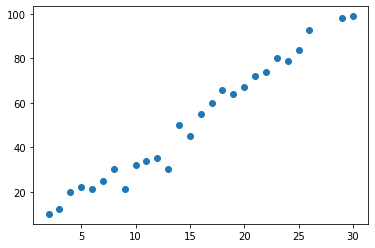

In [22]:


plt.scatter(x, Y)# nuage de point
plt.show()

#  Création du modèle (model(X,theta) )

In [43]:
m=len(x)
x_ones =np.ones(m)#créer une colonne de m lignes de 1
#x_ones.reshape(len(x),1)
x_ones.shape


(27,)

In [45]:

X=np.column_stack((x, x_ones))#construire la matrice X=(x,x_ones)
X.shape
#np.reshape(np.hstack((a, b, c)), (2, 3))
# array([[ 0,  1,  2], [ 1, -1, -1]]) ## Reshaping won't help
#a = np.array([[1, 2, 3], [4, 5, 6]])

(27, 2)

In [48]:
theta=np.random.randn(2,1)# definir theta
theta.shape

(2, 1)

In [52]:
#faire le produit des deux matrices theta.X=F le modele
def modele(X,theta):  #F=np.dot(X,theta)
    F = X.dot(theta)
    return(F)
F.shape

(27, 1)

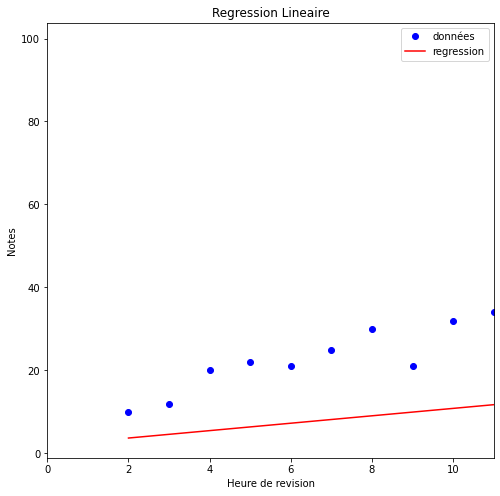

In [56]:
#representation graphique du modele, la droite + le nuage
plt.rcParams['figure.figsize'] = 8, 8 # ajuste la taille des figures

plt.plot(x, Y, "bo", label="données") # les points (x, y) representes par des points
plt.plot( x,F,"r-",label="regression")# droite de regression,couleur rouge avec un trait continu
plt.xlabel("Heure de revision") # nom de l'axe x
plt.ylabel("Notes") # nom de l'axe y
plt.xlim(0, 11) # échelle axe x
plt.legend() # la legende
plt.title("Regression Lineaire") # titre de graphique
plt.show()

# Fonction du coût (fonction_cout(X,Y,theta))